In [4]:
import pandas as pd
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier

In [8]:
df  = pd.read_csv('heart1.csv')

In [9]:
import pandas as pd
df= pd.read_csv('heart1.csv')

Text(0, 0.5, 'Number of patients')

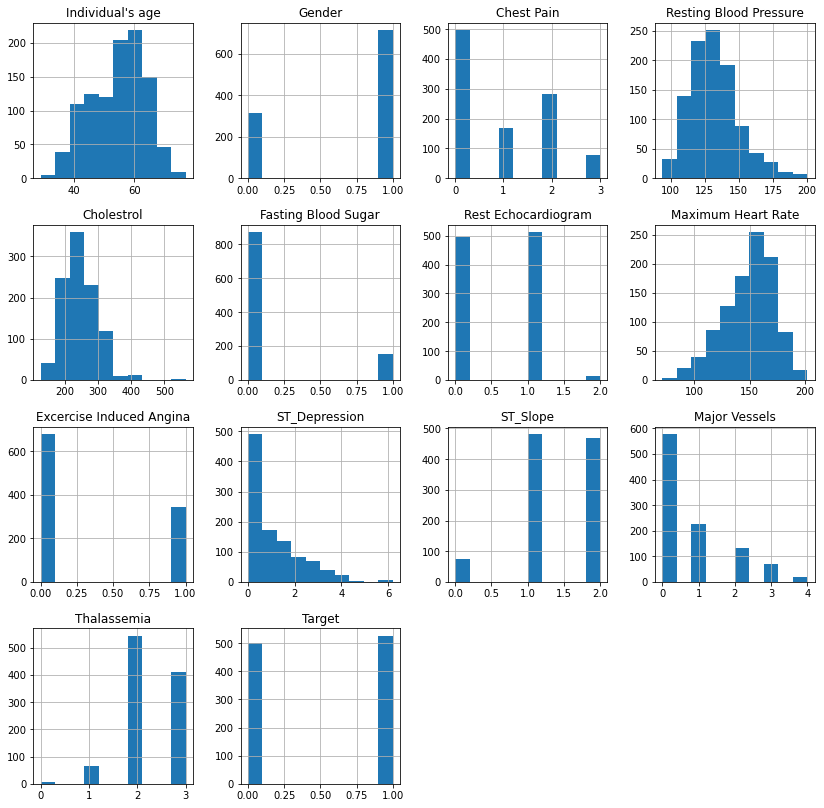

In [10]:
import matplotlib.pyplot as plt
df.hist(figsize=(14,14))
plt.ylabel('Number of patients')



In [11]:
df.shape

(1025, 14)

In [43]:
df.astype({'oldpeak':'int64'}).dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [44]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values

In [45]:
y=df[['target']].values

In [46]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [47]:
y = y.flatten()
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
#y = y.flatten()
print(y)

[0 0 0 ... 0 1 0]


In [49]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [50]:
    knn = KNeighborsClassifier(n_neighbors = 20)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.7121951219512195


In [51]:
pickle.dump(knn,open('heart_knn_model.sav','wb'))

In [52]:
predict = knn.predict(X_test)
accuracy  = metrics.accuracy_score(y_test,predict)

In [53]:
predict

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [54]:
accuracy

0.7121951219512195

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [57]:
prediction = clf.predict(X_test)
accuracy2 = metrics.accuracy_score(y_test,prediction)

In [58]:
print(prediction)
print(accuracy2)

[1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0]
1.0


In [59]:
pickle.dump(clf,open('heart_dt_model.sav','wb'))

In [60]:
clf = pickle.load(open('heart_dt_model.sav','rb'))

In [61]:
pre = clf.predict(X_test)
pre
acc = metrics.accuracy_score(y_test,pre)
acc

1.0

In [62]:
input = [[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]
p = clf.predict(input)

In [63]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
p = rf.predict_proba(X_test)

#a = metrics.accuracy_score(y_test, p)
p

array([[0.05, 0.95],
       [0.02, 0.98],
       [0.39, 0.61],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.11, 0.89],
       [0.07, 0.93],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.84, 0.16],
       [0.03, 0.97],
       [0.06, 0.94],
       [0.07, 0.93],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.94, 0.06],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.06, 0.94],
       [0.01,

In [65]:
pickle.dump(clf,open('heart_rt_model.pkl','wb'))
clf = pickle.load(open('heart_rt_model.pkl','rb'))


In [66]:
import joblib

In [67]:
joblib.dump(rf,'heart_rt_model1.sav')

['heart_rt_model1.sav']

In [68]:
model = joblib.load('heart_rt_model1.sav')

In [69]:
model.predict_proba(X_test)

array([[0.05, 0.95],
       [0.02, 0.98],
       [0.39, 0.61],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.11, 0.89],
       [0.07, 0.93],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.84, 0.16],
       [0.03, 0.97],
       [0.06, 0.94],
       [0.07, 0.93],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.94, 0.06],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.06, 0.94],
       [0.01,